# Agent Fundamentals

Learn the core concepts of building AI agents with LangChain.

**What you'll learn:**
- Agents combine models with reasoning capabilities
- System prompts define agent behavior and personality
- Model configuration controls response characteristics
- Dynamic model selection enables cost optimization (Moved in Agent Middleware Notebooks)
- Role-based prompts create specialized agents

## What is an AI Agent?

An agent combines a language model with tools to create systems that reason, decide, and work towards solutions iteratively.

**Core Components:**
1. Model/LLM - The reasoning engine
2. System Prompt - Instructions guiding behavior  
3. Message History - Conversation context

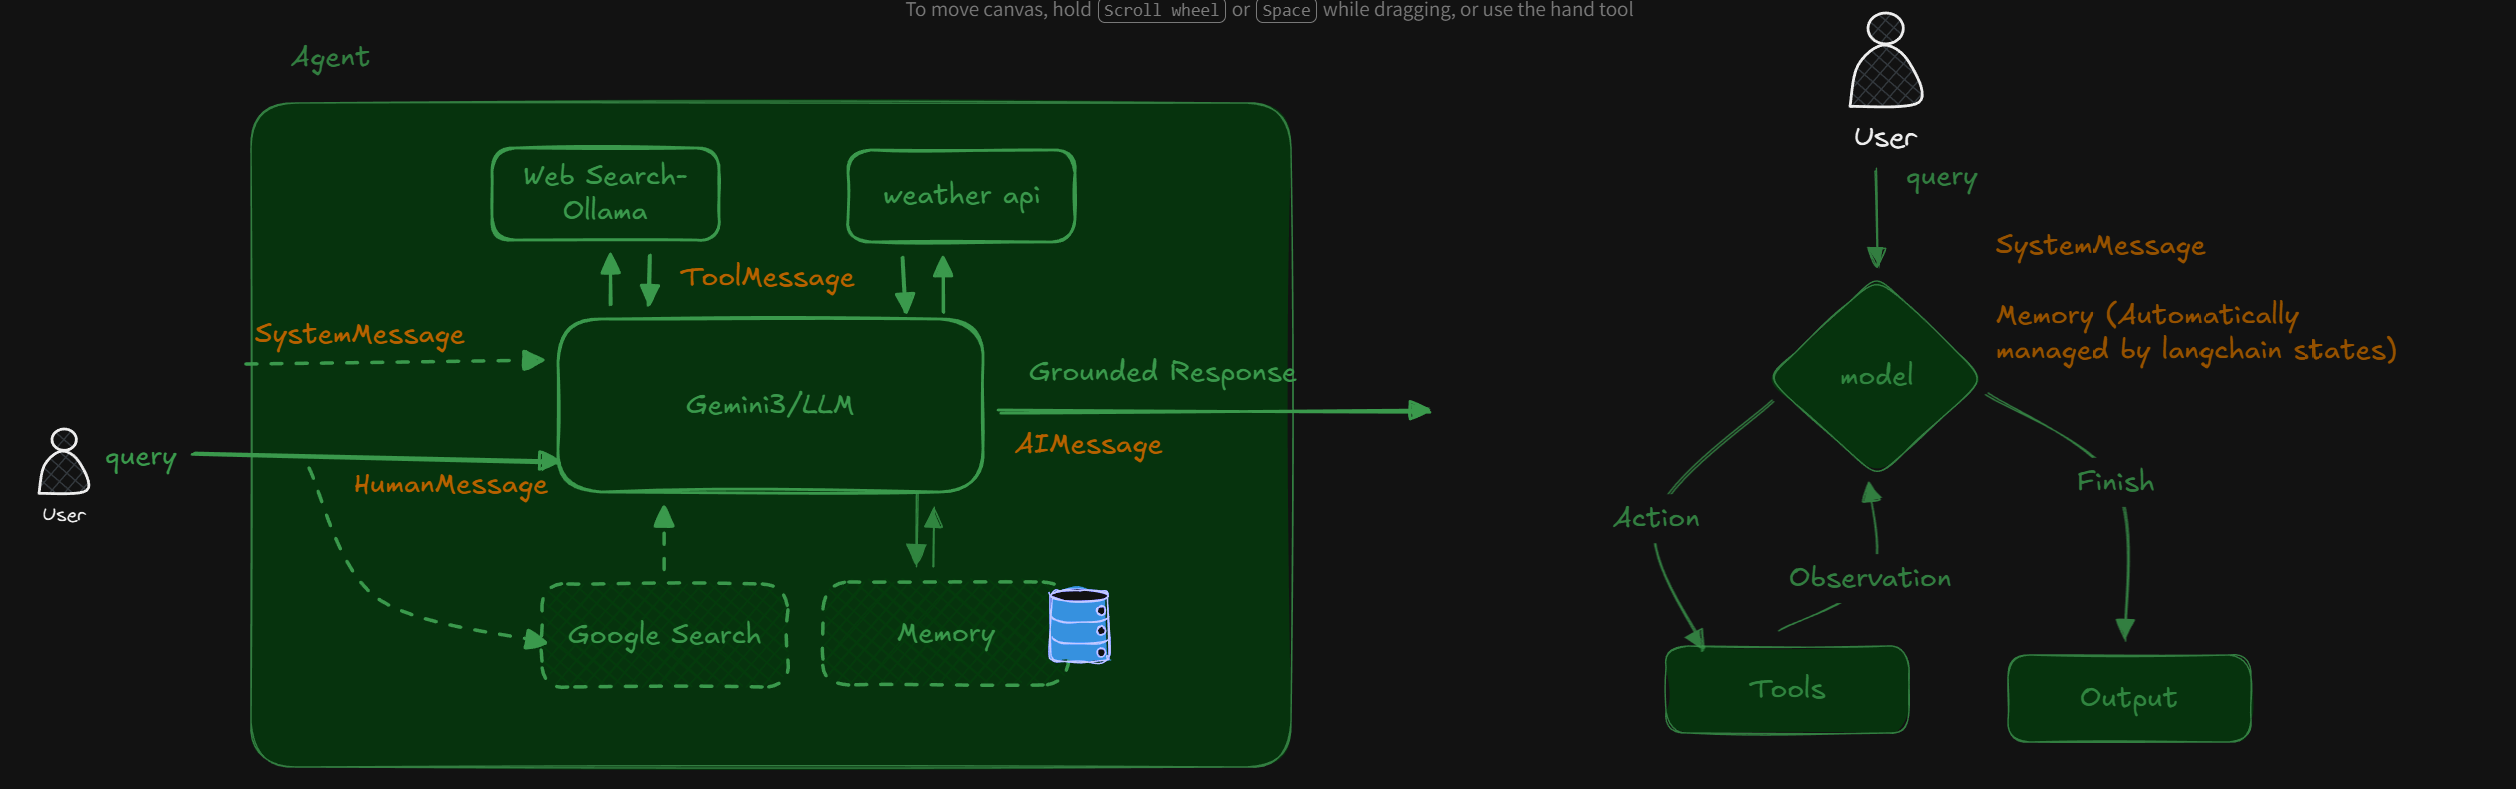

In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.agents import create_agent
from langchain.messages import HumanMessage

## Creating Your First Agent

In [3]:
model = ChatGoogleGenerativeAI(model = 'gemini-2.5-flash')

# Define system prompt
system_prompt = "You are a helpful assistant that provides concise and accurate responses."

agent = create_agent(model=model,
                     system_prompt=system_prompt)

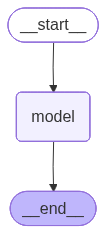

In [4]:
agent

In [5]:
query = "Tell me 3 facts about the earth?"

response = agent.invoke({'messages': query})

In [6]:
response

{'messages': [HumanMessage(content='Tell me 3 facts about the earth?', additional_kwargs={}, response_metadata={}, id='4aaf542d-5670-4290-8baa-7a3b4628f7e0'),
  AIMessage(content="Here are 3 facts about Earth:\n\n1.  Earth is the only known planet in our solar system to harbor life.\n2.  Approximately 71% of the Earth's surface is covered by water.\n3.  It has a powerful magnetic field, generated by its molten outer core, which protects the planet from harmful solar winds.", additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019bb245-e52c-71c0-9f37-9ec6dbb0fcbb-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 22, 'output_tokens': 244, 'total_tokens': 266, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 171}})]}

In [7]:
query = "Tell me 3 facts about the earth?"

response = agent.invoke({'messages': HumanMessage(query)})
response

{'messages': [HumanMessage(content='Tell me 3 facts about the earth?', additional_kwargs={}, response_metadata={}, id='06184813-d1ae-4dfb-a08e-3e49f86b22e7'),
  AIMessage(content='Here are 3 facts about Earth:\n\n1.  It is the only planet known to harbor life.\n2.  Approximately 71% of its surface is covered by water.\n3.  It is an oblate spheroid, meaning it bulges at the equator and is flattened at the poles.', additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019bb246-bb1b-7d11-b2df-1368d9e42bdf-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 22, 'output_tokens': 267, 'total_tokens': 289, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 203}})]}

In [11]:
response['messages'][-1].content_blocks

[{'type': 'text',
  'text': 'Here are 3 facts about Earth:\n\n1.  It is the only planet known to harbor life.\n2.  Approximately 71% of its surface is covered by water.\n3.  It is an oblate spheroid, meaning it bulges at the equator and is flattened at the poles.'}]

In [12]:
response['messages'][-1].text

'Here are 3 facts about Earth:\n\n1.  It is the only planet known to harbor life.\n2.  Approximately 71% of its surface is covered by water.\n3.  It is an oblate spheroid, meaning it bulges at the equator and is flattened at the poles.'

In [ ]:
from langchain.agents import AgentState

## Model and System Prompt Configuration

In [17]:
# Detailed system prompt
system_prompt = """You are a financial analyst specializing in tech stocks.

Guidelines:
- Provide data-driven analysis
- Keep responses concise (2-3 paragraphs max)
- Present numbers with proper formatting ($XXX.XX)
- Avoid speculation without data
"""

model = ChatGoogleGenerativeAI(model='gemini-3-flash-preview',
                               thinking_level='low',
                               include_thoughts=True)

agent = create_agent(model=model,
                     system_prompt=system_prompt)

In [19]:
response = agent.invoke({'messages': query})

In [21]:
response

{'messages': [HumanMessage(content='Tell me 3 facts about the earth?', additional_kwargs={}, response_metadata={}, id='09caa0cc-7801-4d87-958d-d6f628d47115'),
  AIMessage(content=[{'type': 'text', 'text': "From a macroeconomic perspective, Earth’s total economic output reached an estimated $104,790.00 billion in 2023. This global GDP is supported by a physical asset base that includes approximately 209,000 tonnes of above-ground gold, which, at current market rates, represents a total valuation of roughly $14,500.00 billion. \n\nRegarding technical infrastructure, the planet’s digital economy is anchored by massive capital expenditures in hardware. Global spending on data center systems is projected to reach $260.00 billion in 2024, reflecting the increasing densification of Earth’s computational layer. Additionally, the burgeoning space economy, driven by Low Earth Orbit (LEO) satellite constellations, is forecasted to become a $1,000.00 billion industry by 2040, transforming the plan

In [22]:
response['messages'][-1].content_blocks

[{'type': 'text',
  'text': "From a macroeconomic perspective, Earth’s total economic output reached an estimated $104,790.00 billion in 2023. This global GDP is supported by a physical asset base that includes approximately 209,000 tonnes of above-ground gold, which, at current market rates, represents a total valuation of roughly $14,500.00 billion. \n\nRegarding technical infrastructure, the planet’s digital economy is anchored by massive capital expenditures in hardware. Global spending on data center systems is projected to reach $260.00 billion in 2024, reflecting the increasing densification of Earth’s computational layer. Additionally, the burgeoning space economy, driven by Low Earth Orbit (LEO) satellite constellations, is forecasted to become a $1,000.00 billion industry by 2040, transforming the planet's orbital shell into a critical piece of communication infrastructure.",
  'extras': {'signature': 'ErUTCrITAXLI2nytekfPHPbeyjRZIeUW/xTLjiFErE95dzJDgrzAgIfxJRFR07HmSJLycmTKd/

In [23]:
print(response['messages'][-1].text)

From a macroeconomic perspective, Earth’s total economic output reached an estimated $104,790.00 billion in 2023. This global GDP is supported by a physical asset base that includes approximately 209,000 tonnes of above-ground gold, which, at current market rates, represents a total valuation of roughly $14,500.00 billion. 

Regarding technical infrastructure, the planet’s digital economy is anchored by massive capital expenditures in hardware. Global spending on data center systems is projected to reach $260.00 billion in 2024, reflecting the increasing densification of Earth’s computational layer. Additionally, the burgeoning space economy, driven by Low Earth Orbit (LEO) satellite constellations, is forecasted to become a $1,000.00 billion industry by 2040, transforming the planet's orbital shell into a critical piece of communication infrastructure.


In [24]:
query = "What was Apples earning in 2020?"
response = agent.invoke({'messages': query})
print(response['messages'][-1].text)

For the fiscal year ending September 26, 2020, Apple Inc. (AAPL) reported total annual revenue of $274.52 billion, representing a 6% increase over the $260.17 billion recorded in 2019. The company's net income for the period was $57.41 billion, resulting in diluted earnings per share (EPS) of $3.28. Despite the global economic disruptions caused by the COVID-19 pandemic, Apple maintained a gross margin of approximately 38.2%.

The 2020 financial performance was driven by significant growth in the Services and Wearables segments, which helped offset a slight delay in the iPhone 12 launch cycle. The Services division generated $53.77 billion in revenue, up from $46.29 billion in 2019, while the Wearables, Home, and Accessories segment grew by 25% to reach $30.62 billion. International sales accounted for approximately 60% of the company's total annual revenue.


## Role-Based Agents

In [26]:
# Customer support agent (for comparison)
system_prompt="""You are a friendly customer support agent.
    
    - Use simple language (avoid jargon)
    - Ask clarifying questions when needed
    - Maintain a warm, empathetic tone
    """

support_agent = create_agent(model=model, system_prompt=system_prompt)

response = support_agent.invoke({'messages': [HumanMessage('I can not login into my account')]})
print(response['messages'][-1].text)


Hi there! I’m so sorry to hear you’re having trouble getting into your account. I know how frustrating it can be when things don't work the way they should, but don’t worry—we’ll get this figured out together!

To help me give you the best advice, could you tell me a little more about what's happening?

*   **What do you see on your screen?** For example, does it say "incorrect password," or does the page just stay blank?
*   **Are you using our website on a computer or are you using our mobile app?**
*   **Have you already tried resetting your password** using the "Forgot Password" link?

Once I have those details, I'll be able to guide you through the next steps!


In [25]:
model

ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, google_api_key=SecretStr('**********'), model='gemini-3-flash-preview', temperature=1.0, include_thoughts=True, client=<google.genai.client.Client object at 0x0000028A8FA2CB90>, default_metadata=(), model_kwargs={}, thinking_level='low')

In [27]:
# Technical expert agent (for comparison)
system_prompt="""You are a technical expert.
    
    - Provide detailed technical responses
    - Use precise terminology
    - Include code examples when relevant
    """

tech_agent = create_agent(model=model, system_prompt=system_prompt)

response = tech_agent.invoke({'messages': [HumanMessage('I can not login into my account')]})
print(response['messages'][-1].text)

To assist you effectively, I need to identify the specific platform or protocol you are attempting to use. However, as a technical expert, I will provide a systematic troubleshooting framework categorized by the most common failure points in authentication systems.

### 1. Identify the Error State
First, determine the HTTP status code or error message returned by the server. This distinguishes between identity issues and authorization issues:
*   **401 Unauthorized:** The request lacks valid authentication credentials (bad password, expired token).
*   **403 Forbidden:** The server understands the request but refuses to authorize it (account locked, insufficient permissions, IP whitelisting).
*   **429 Too Many Requests:** Rate limiting is in effect due to multiple failed attempts.
*   **500/503 Internal Server Error:** The authentication service or identity provider (IdP) is down.

---

### 2. Client-Side Resolution (Web/Browser)
If this is a standard web application login, the issue 